In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import json

In [13]:
X_train = np.load("nlp_adbench/email_spam_train_data_gpt_text-embedding-3-large_feature.npy")
X_test = np.load("nlp_adbench/email_spam_test_data_gpt_text-embedding-3-large_feature.npy")

X = np.concatenate((X_train, X_test))

In [14]:
def load_labels(file_path):
    labels = []
    with open(file_path, "r") as file:
        for line in file:
            data = json.loads(line)
            labels.append(data["label"])  
    return np.array(labels)

y_train = load_labels("nlp_adbench/email_spam_train_data.jsonl")
y_test = load_labels("nlp_adbench/email_spam_test_data.jsonl")
y = np.concatenate((y_train, y_test))

In [16]:
data_dict = {'X': X, 'y': y}

np.savez(f'email.npz', **data_dict)

In [4]:
len(y)

3578

In [5]:
sum(y)

146

In [6]:
print("Feature array shape:", X.shape)
print("Label array shape:", y.shape)

Feature array shape: (3578, 3072)
Label array shape: (3578,)


In [ ]:
print("Max value in X:", np.max(X, ))
print("Min value in X:", np.min(X))


Max value in X: 5.164437535652438e+294
Min value in X: -0.13934031128883362


In [11]:
np.unique(X)[-30]

0.13074295222759247

In [ ]:
X = np.clip(X, -1e6, 1e6)  # Ograniczenie ekstremalnych wartości


In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [9]:
X_pca.shape

(3578, 50)

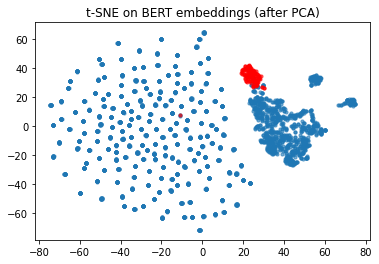

In [20]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Wizualizacja
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], label="Normal", alpha=0.6, s=10)
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], label="Anomaly", alpha=0.6, s=10, color='red')
plt.title("t-SNE on BERT embeddings (after PCA)")
plt.show()